# # K-means Clustering Analysis on Accident Dataset  
# **Objective:**  
# Identify natural groupings in accident data by applying K-means clustering, evaluating results, and visualizing findings.

## **Step 1: Data Loading & Preprocessing**

### **1.1 Load Dataset**


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA

df = pd.read_csv('cleaned_data.csv')  # Load cleaned accident data



### **1.2 Data Summary**  
**Actions:**  
- Drop target variable (`Accident_Severity`).  
- Remove missing values.  

In [9]:
df = df.drop(columns=['Accident_Severity'])  # Drop target variable
df = df.dropna()                             # Remove missing values


 **Justification:**  
- Clustering requires complete data.  
- Standardization ensures equal feature weighting.  

In [10]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## **Step 2: Determine Optimal Clusters (K)**

### **2.1 Elbow Method**

/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


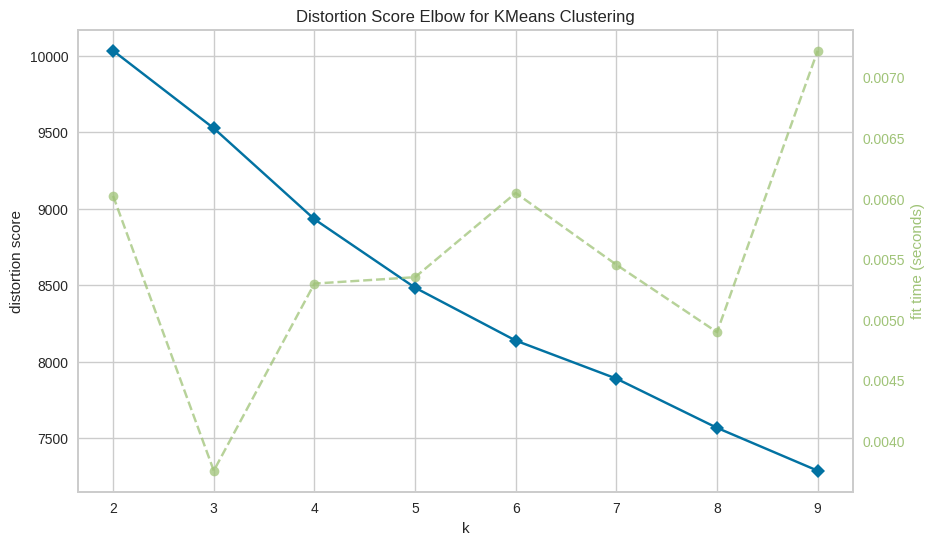

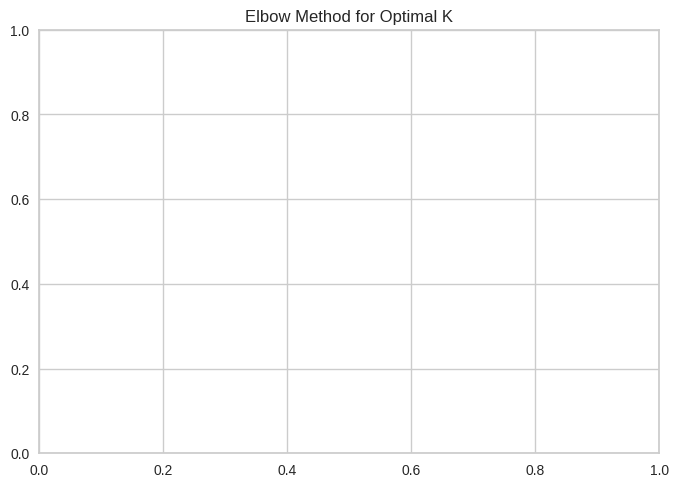

In [11]:
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()
plt.title('Elbow Method for Optimal K')
plt.show()


### **2.2 Silhouette Analysis**

k=2: Silhouette Score = 0.1003
k=3: Silhouette Score = 0.0939
k=4: Silhouette Score = 0.0865
k=5: Silhouette Score = 0.0868
k=6: Silhouette Score = 0.0902
k=7: Silhouette Score = 0.0798
k=8: Silhouette Score = 0.0751
k=9: Silhouette Score = 0.0803


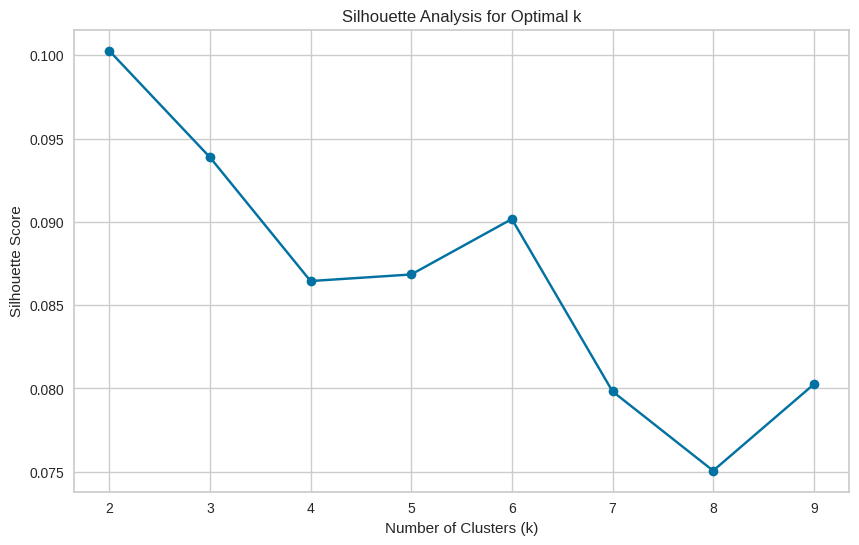

In [12]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

## **Step 3: Clustering & Visualization**

### **3.1 Fit K-means for Selected K Values**

In [13]:
k_values = [2, 4, 6]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    results[k] = {
        'model': kmeans,
        'labels': kmeans.labels_,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(scaled_data, kmeans.labels_)
    }

### **3.2 PCA for 2D Visualization**

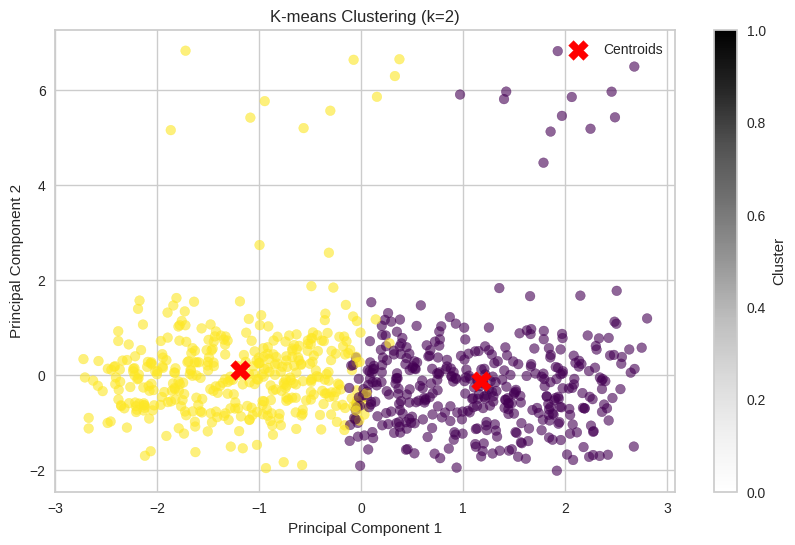

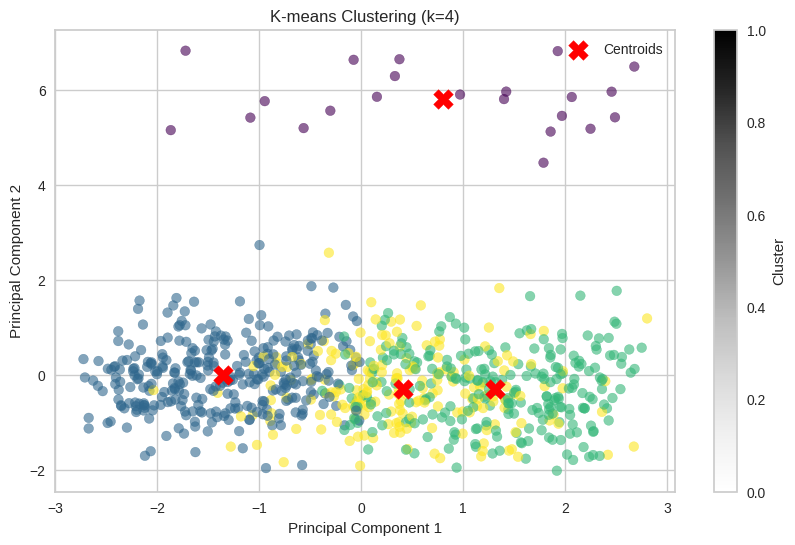

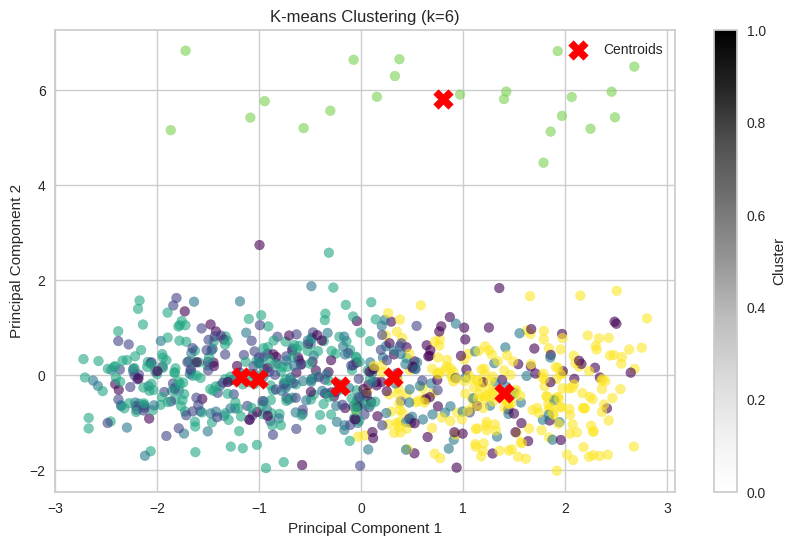

In [14]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

for k in k_values:
    plt.figure(figsize=(10, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1],
                c=results[k]['labels'], cmap='viridis', alpha=0.6)
    plt.scatter(pca.transform(results[k]['model'].cluster_centers_)[:, 0],
                pca.transform(results[k]['model'].cluster_centers_)[:, 1],
                marker='X', s=200, c='red', label='Centroids')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.colorbar(label='Cluster')
    plt.show()


### **3.3 Silhouette Plots**

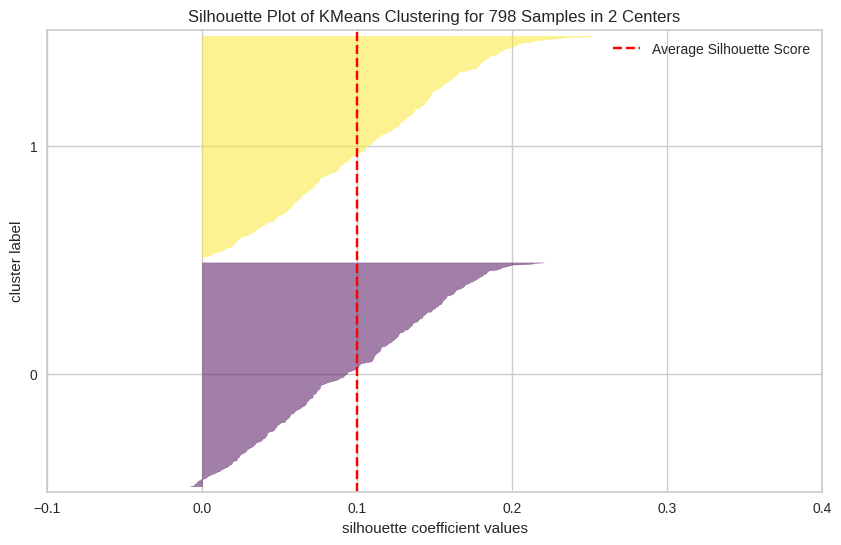

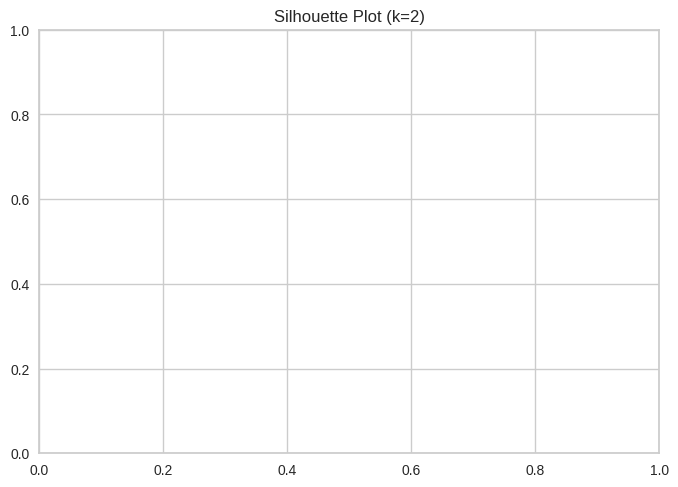

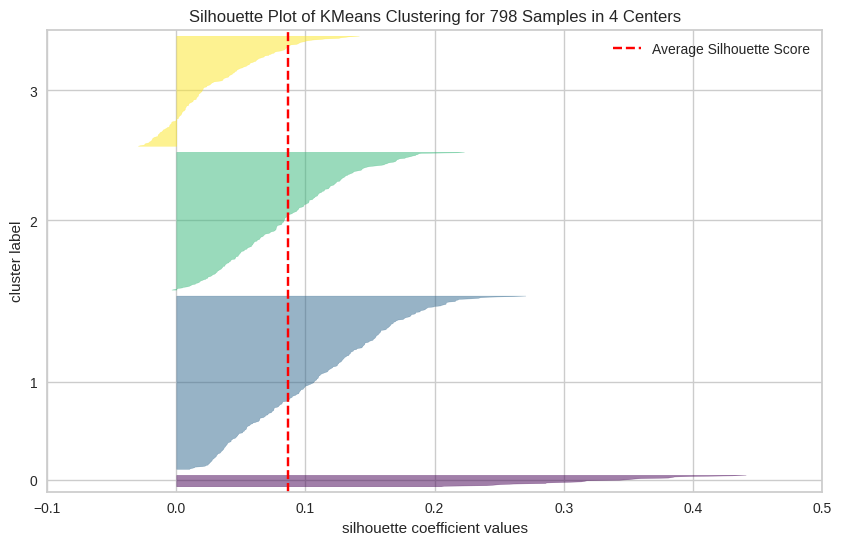

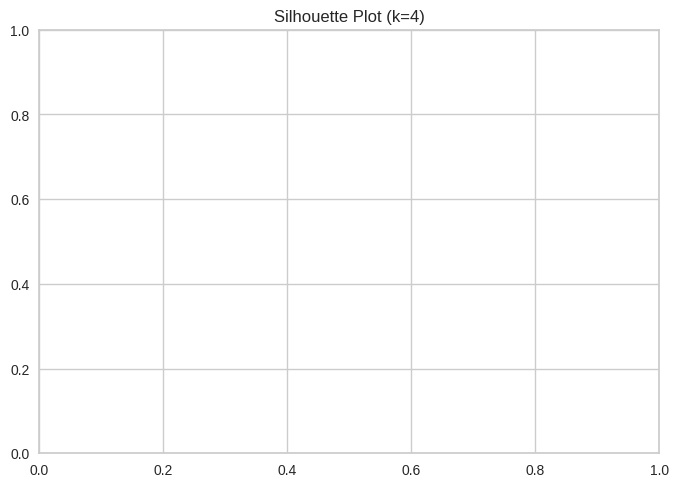

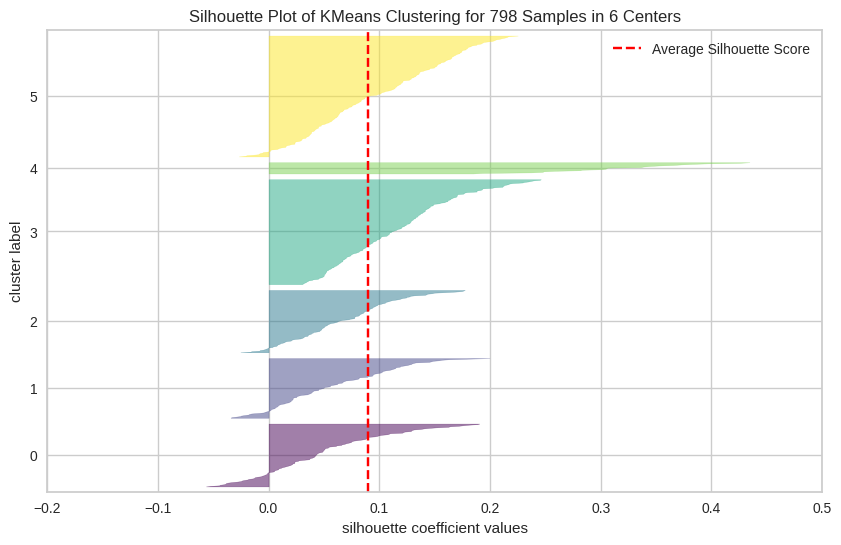

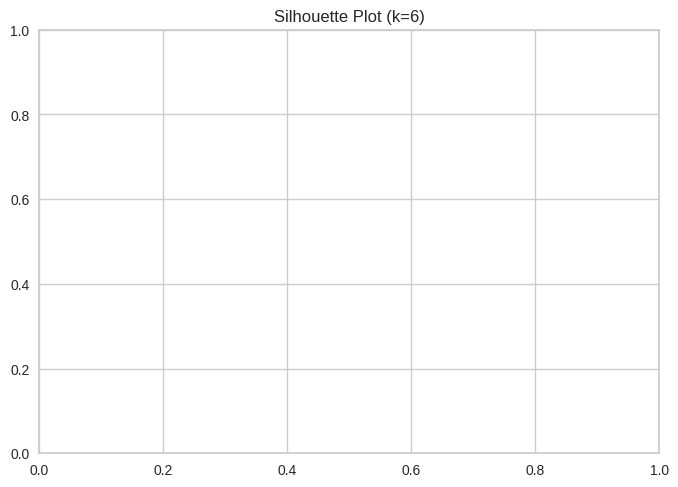

In [15]:
for k in k_values:
    plt.figure(figsize=(10, 6))
    visualizer = SilhouetteVisualizer(results[k]['model'], colors='viridis')
    visualizer.fit(scaled_data)
    visualizer.show()
    plt.title(f'Silhouette Plot (k={k})')
    plt.show()

## **Step 4: Results Comparison & Interpretation**

### **4.1 Metrics Comparison**

In [16]:
print(f"{'k':<5}{'Inertia':<15}{'Silhouette Score':<20}")
for k in k_values:
    print(f"{k:<5}{results[k]['inertia']:<15.2f}{results[k]['silhouette']:<20.4f}")


k    Inertia        Silhouette Score    
2    10033.61       0.1003              
4    8931.66        0.0865              
6    8138.06        0.0902              


### **4.2 Cluster Characteristics (k=4)**

<Figure size 1500x800 with 0 Axes>

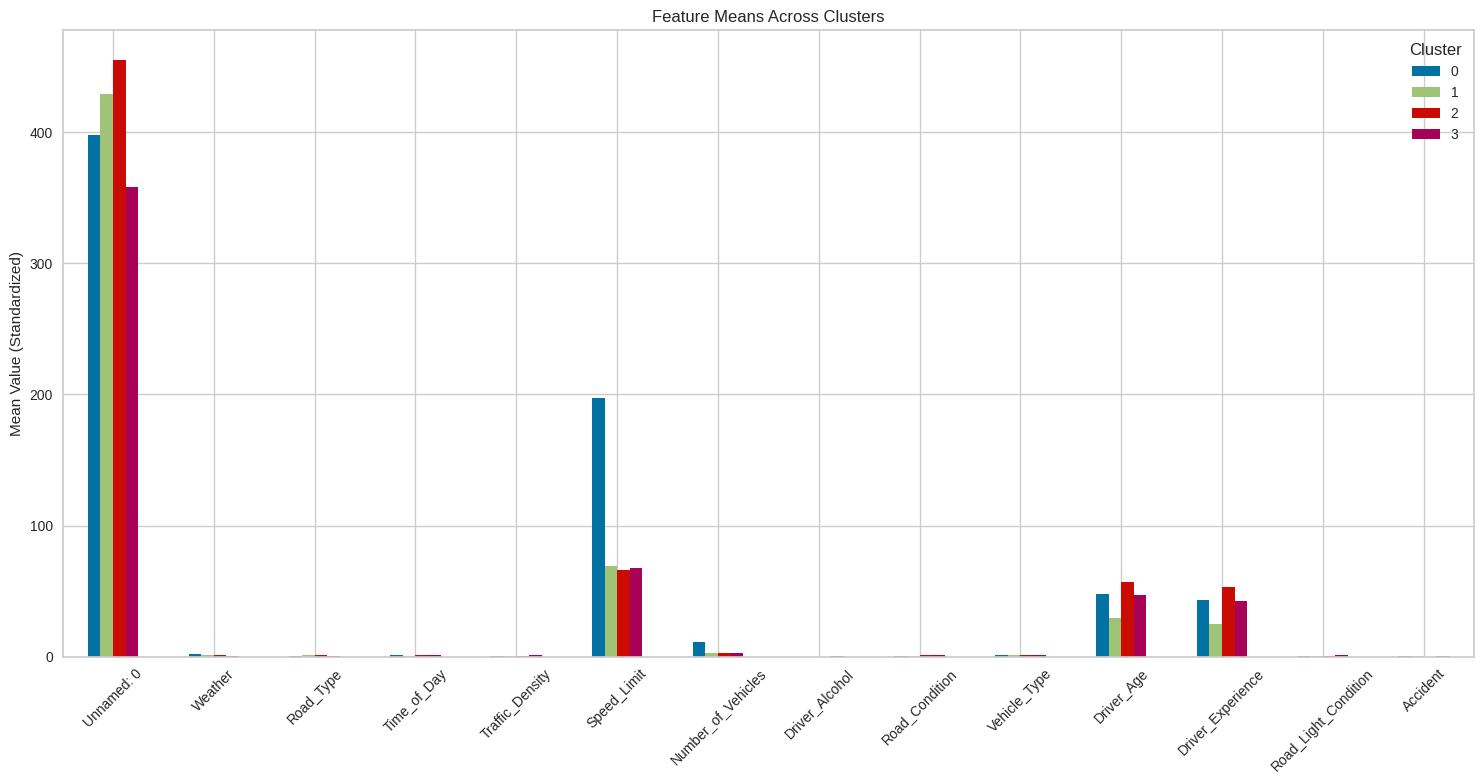

In [17]:
best_k = 4
df['Cluster'] = results[best_k]['labels']
cluster_stats = df.groupby('Cluster').mean()

plt.figure(figsize=(15, 8))
cluster_stats.T.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Means Across Clusters')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

 **Interpretation:**  
- Clusters with high `Speed_Limit` may indicate accident-prone zones.  
- Differences in `Weather_Conditions` could suggest environmental risk factors.  

### **Final Notes**  
- **Optimal K**: Chose `k=4` based on silhouette scores.  
- **Next Steps**: Explore domain-specific insights (e.g., high-risk clusters for policy interventions).